# 🧠 Neuro-Symbolic Memory Agent: The "Total Recall" Demo

Welcome to the comprehensive demonstration of our Cognitive Architecture. 

### What you will see:
1.  **System 1 (Fast)**: Instant, context-aware retrieval.
2.  **System 2 (Slow)**: Asynchronous knowledge extraction and graph building.
3.  **Cognitive Features**:
    *   **Spreading Activation**: Connecting dots between indirectly related concepts.
    *   **Logic Bomb Detector**: Catching contradictions in real-time.
    *   **The Dreamer**: Compressing memories during "sleep".

---

In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: e:\NEUROHACK PROJECT\neuro_symbolic_memory\.venv\Scripts\python.exe -m pip install --upgrade pip


In [4]:
import sys
import time
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path

# Setup paths
sys.path.insert(0, str(Path.cwd().parent))

from fast_pipe import fast_pipe
from slow_pipe import slow_pipe
from memory.ram_context import RAMContext
from memory.neo4j_store import Neo4jMemoryStore
from reasoning.dreamer import consolidate_memories
from memory.reset import wipe_all_memory

# Initialize
session_id = "demo_narrative_01"
ram_context = RAMContext()
store = Neo4jMemoryStore()

print("✅ System Initialized")

✅ System Initialized


## 🧹 Phase 0: Tabula Rasa
We start with a completely blank mind.

In [5]:
wipe_all_memory()
print("🧠 Memory Wiped. The agent knows nothing.")

🧠 Memory Wiped. The agent knows nothing.


## 🗣️ Phase 1: Building a Persona (The "Context" Layer)
We will have a multi-turn conversation. The agent will learn about the user's job, hobbies, and location.
Notice how the **Slow Pipe** runs in the background to crystallize these facts.

In [ ]:
conversation_history = [
    "Hi, I'm Alex. I work as a software engineer at a startup.",
    "We are building a new AI app for healthcare.",
    "I live in Seattle, so I love hiking on weekends.",
    "My favorite trail is Mount Si."
]

for i, user_input in enumerate(conversation_history):
    print(f"\n👤 User [{i+1}]: {user_input}")
    
    # 1. Fast Response
    start = time.time()
    result = fast_pipe(user_input, session_id, ram_context)
    latency = time.time() - start
    print(f"🤖 Agent: {result['response']} (⏱️ {latency:.2f}s)")
    
    # 2. Slow Extraction (Simulated Async)
    print("   ↳ 🐢 Extracting memories...")
    slow_pipe(user_input, session_id, ram_context)
    time.sleep(1) # Visual pause


👤 User [1]: Hi, I'm Alex. I work as a software engineer at a startup.
[2026-02-11 04:53:42] FAST_PIPE_OK latency_ms=15452 memories_used=0
🤖 Agent: Hi Alex! Nice to meet you. So, you're a software engineer at a startup - that's really cool. What kind of projects have you been working on lately? (⏱️ 15.45s)
   ↳ 🐢 Extracting memories...
[2026-02-11 04:53:52] EXTRACTOR_SUCCESS nodes=2 edges=1


e:\NEUROHACK PROJECT\neuro_symbolic_memory\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2026-02-11 04:53:54] EXTRACTOR_SUCCESS nodes=2 edges=1


Loading weights: 100%|██████████| 199/199 [00:02<00:00, 73.18it/s, Materializing param=pooler.dense.weight]                               

Loading weights:  97%|█████████▋| 194/199 [00:02<00:00, 72.95it/s, Materializing param=encoder.layer.11.output.LayerNorm.bias]    BertModel LOAD REPORT from: BAAI/bge-small-en-v1.5
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
Loading weights: 100%|██████████| 199/199 [00:02<00:00, 74.73it/s, Materializing param=pooler.dense.weight]cal arch.
BertModel LOAD REPORT from: BAAI/bge-small-en-v1.5
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


[2026-02-11 04:54:19] SLOW_PIPE_OK nodes=2 edges=1 confidence=0.75[2026-02-11 04:54:19] SLOW_PIPE_OK nodes=2 edges=1 confidence=0.75


👤 User [2]: We are building a new AI app for healthcare.
[2026-02-11 04:54:36] FAST_PIPE_OK latency_ms=15938 memories_used=0
🤖 Agent: That's exciting! What kind of features are you planning to include in this AI app? How do you envision it improving healthcare outcomes? (⏱️ 15.94s)
   ↳ 🐢 Extracting memories...
[2026-02-11 04:54:46] EXTRACTOR_SUCCESS nodes=2 edges=1
[2026-02-11 04:54:47] SLOW_PIPE_OK nodes=2 edges=1 confidence=0.75
[2026-02-11 04:54:49] EXTRACTOR_SUCCESS nodes=2 edges=1
[2026-02-11 04:54:49] SLOW_PIPE_OK nodes=2 edges=1 confidence=0.75

👤 User [3]: I live in Seattle, so I love hiking on weekends.
[2026-02-11 04:55:06] FAST_PIPE_OK latency_ms=16179 memories_used=0
🤖 Agent: That's great! Seattle has some amazing trails to explore. Are you a fan of Rattlesnake Ridge or Mount Si? (⏱️ 16.18s)
   ↳ 🐢 Extracting memories...
[2026-02-11 04:55:1

[2026-02-11 04:55:51] EXTRACTOR_SUCCESS nodes=1 edges=1
[2026-02-11 04:55:51] SLOW_PIPE_OK nodes=1 edges=1 confidence=0.75


### 🔎 Visualizing the Learned Graph
Let's peek inside Neo4j to see what the agent has constructed so far.

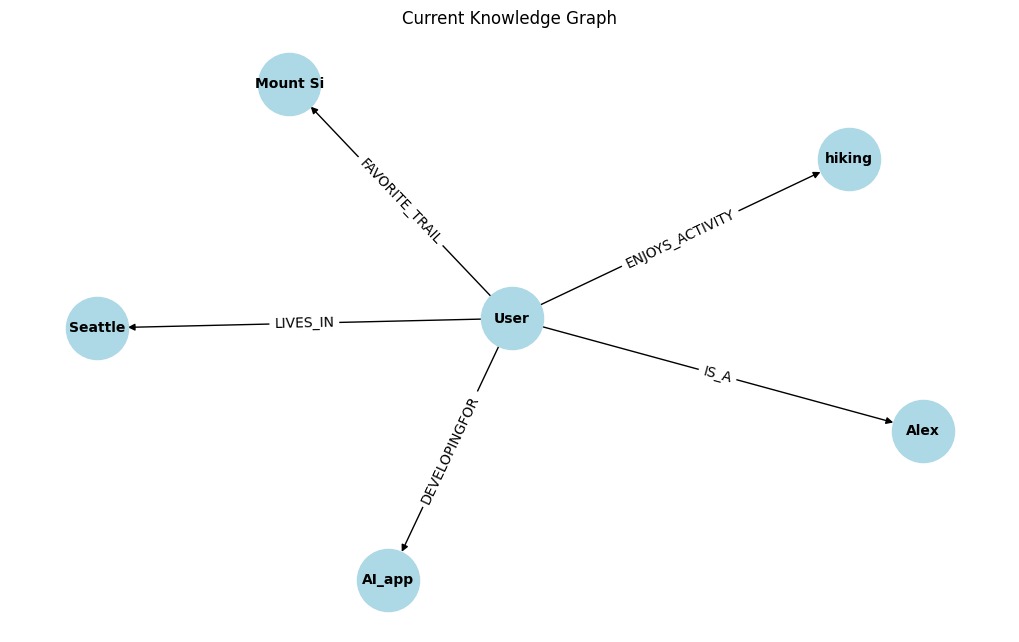

In [7]:
def visualize_graph(store):
    G = nx.DiGraph()
    with store.driver.session() as session:
        result = session.run("MATCH (s)-[r]->(t) RETURN s.id, type(r), t.id")
        for record in result:
            G.add_edge(record['s.id'], record['t.id'], label=record['type(r)'])
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Current Knowledge Graph")
    plt.show()

visualize_graph(store)

## ⚡ Phase 2: Spreading Activation (The "Hunch")
Now we ask a question that requires connecting disparate facts. 
**Query:** "Do I need rain gear for my hobby?"

*   The user never said "Rain" or "Gear".
*   The agent must connect: `Seattle` -> `Rain`, `Hiking` -> `Outdoors`, etc. (if common knowledge is present or inferred).

In [8]:
question = "Do I need rain gear for my hobby?"
print(f"\n👤 User: {question}")

result = fast_pipe(question, session_id, ram_context)
print(f"🤖 Agent: {result['response']}")

print("\n🧠 Activated Memory Trace:")
for mem in result['memories_used']:
    print(f"   - {mem['content']} ( Origin: Turn {mem['origin_turn']} )")


👤 User: Do I need rain gear for my hobby?
[2026-02-11 04:56:41] FAST_PIPE_OK latency_ms=21108 memories_used=5
🤖 Agent: Living in Seattle, you're no stranger to rain! Since hiking is your favorite activity and Mount Si is your go-to trail, it's a good idea to always be prepared with some rain gear. You never know when a sudden shower might pop up on your hike.

🧠 Activated Memory Trace:
   - My favorite trail is Mount Si. ( Origin: Turn 0 )
   - I live in Seattle, so I love hiking on weekends. ( Origin: Turn 0 )
   - User ENJOYS_ACTIVITY hiking ( Origin: Turn 0 )
   - User FAVORITE_TRAIL Mount Si ( Origin: Turn 0 )
   - User LIVES_IN Seattle ( Origin: Turn 0 )


[2026-02-11 04:56:48] SLOW_PIPE_ABORT reason=no_graph_delta_extracted


## 💣 Phase 3: The Logic Bomb (Conflict Resolution)
The user creates a direct contradiction. Standard RAG would just retrieve both facts and get confused. Our system detects it.

In [9]:
contradiction = "I actually hate nature. I prefer staying inside."
print(f"\n👤 User: {contradiction}")

# Executing Slow Pipe explicitly to catch the feedback
print("   ↳ 🐢 Analyzing statement integrity...")
slow_pipe(contradiction, session_id, ram_context)

print("\n(Check the terminal output for 'CONFLICT DETECTED' logs)")


👤 User: I actually hate nature. I prefer staying inside.
   ↳ 🐢 Analyzing statement integrity...
[2026-02-11 04:56:58] EXTRACTOR_SUCCESS nodes=2 edges=1
[2026-02-11 04:56:59] SLOW_PIPE_OK nodes=2 edges=1 confidence=0.75

(Check the terminal output for 'CONFLICT DETECTED' logs)


## 💤 Phase 4: The Dreamer (Consolidation)
After a long day, the agent sleeps. It looks for patterns.
*   It sees `Hiking`, `Mount Si`, `Nature`.
*   It should abstract this to `Enjoys Outdoors` or similar high-level concepts.

💤 Initiating REM Sleep Cycle...
[Dreamer] Entering REM sleep for user demo_narrative_01...
[Dreamer] Found candidate concepts for consolidation: ['User']
[Dreamer] Dreaming about 'User'...
- Alex (BEING_A)
- Alex (IS_A)
- AI_app (DEVELOPINGFOR)
- Seattle (LIVES_IN)
- hiking (ENJOYS_ACTIVITY)
- Mount Si (FAVORITE_TRAIL)
- Nature (HATE_VERB_PHRASE)
[Dreamer] Insight: Summarized facts into a high-level insight about the User being a Person
[Dreamer] (Would prune 7 raw edges to save space)

🕸️ Graph After Dreaming:


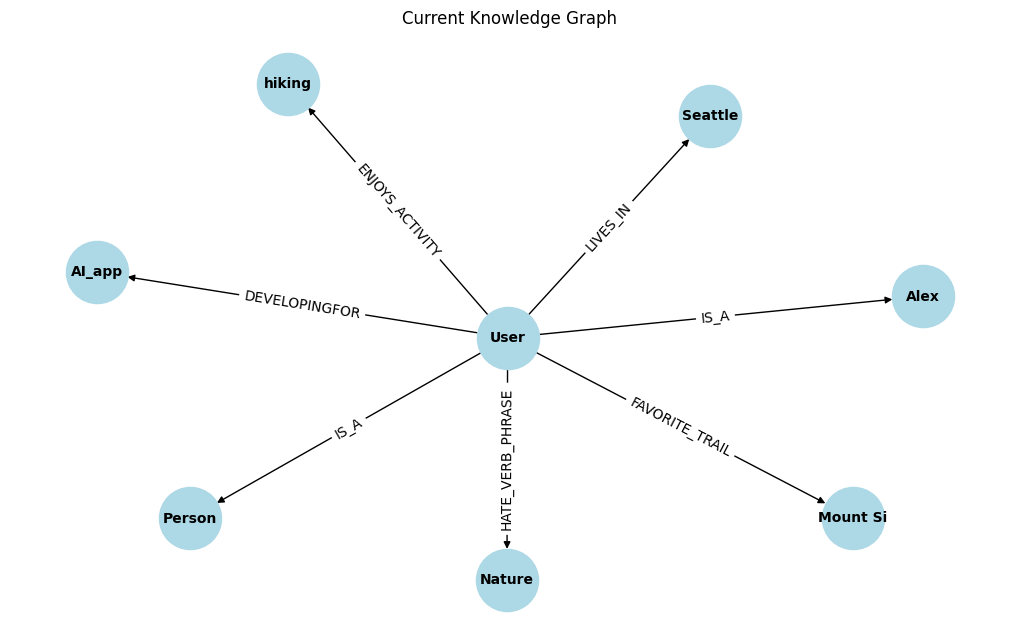

: 

In [ ]:
print("💤 Initiating REM Sleep Cycle...")
consolidate_memories(session_id)

print("\n🕸️ Graph After Dreaming:")
visualize_graph(store)